In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Read data
lists = pd.read_csv("./Data/listings.csv/listings.csv")
pd.set_option('display.max_columns', 500) #expand the size of terminal window to display all rows

## Clean data - only for this case, using Los Angeles as example
lists['zipcode'] = lists['zipcode'].astype(str).\
                                    str.replace('ca','').\
                                    str.replace('CA','').\
                                    str.replace('Near ','').\
                                    str.replace('139 S Valencia Ave, Glendora.','').\
                                    str.extract(r'^(\d{5})')

lists['price'] = lists['price'].astype(str).\
                                str.replace('$','').\
                                str.replace(',','').\
                                astype(float)

lists = lists.query('price > 0')  #filter out listings for free living
lists['cleaning_fee'] = lists['cleaning_fee'].astype(str).\
                                            str.replace('$','').\
                                            str.replace(',','').\
                                            astype(float)

lists['host_since_year'] = lists['host_since'].astype(str).apply(lambda x: x.split('-')[0]) #extract host join year

lists['list_since_year'] = lists['first_review'].astype(str).apply(lambda x: x.split('-')[0]) #extract listing upload year

## Summarize data
#lists.describe()

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


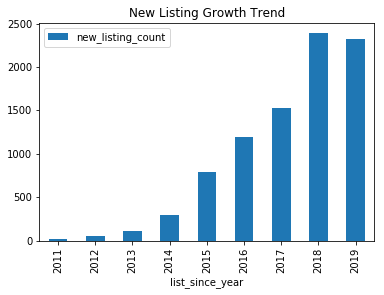

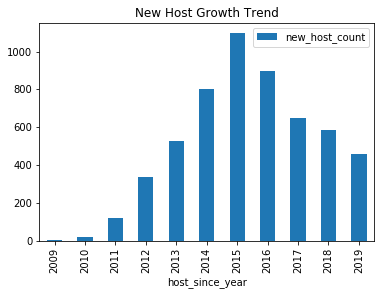

In [12]:
## Bar chart showing the new listing growth rate from 2008
list_growth = pd.DataFrame()
list_growth = lists.groupby('list_since_year')['id'].nunique().reset_index()
list_growth = list_growth.query('list_since_year != "nan"').rename(columns = {'id': 'new_listing_count'})
list_growth.plot(kind = 'bar', x = 'list_since_year', title = 'New Listing Growth Trend')

## Bar chart showing the new host growth rate from 2008
host_growth = pd.DataFrame()
host_growth = lists.groupby('host_since_year')['host_id'].nunique().reset_index()
host_growth = host_growth.query('host_since_year != "nan"').rename(columns = {'host_id': 'new_host_count'})
host_growth.plot(kind = 'bar', x = 'host_since_year', title = 'New Host Growth Trend')

In [14]:
listvalue

,neighbourhood,count,value
3,Kowloon City,487,9.008230
16,Yau Tsim Mong,4737,9.036710
9,Sham Shui Po,258,9.101351
14,Wan Chai,2348,9.179331
8,Sha Tin,119,9.205128
10,Southern,105,9.218750
2,Islands,537,9.220588
17,Yuen Long,256,9.315476
0,Central & Western,2624,9.336712
1,Eastern,398,9.353191


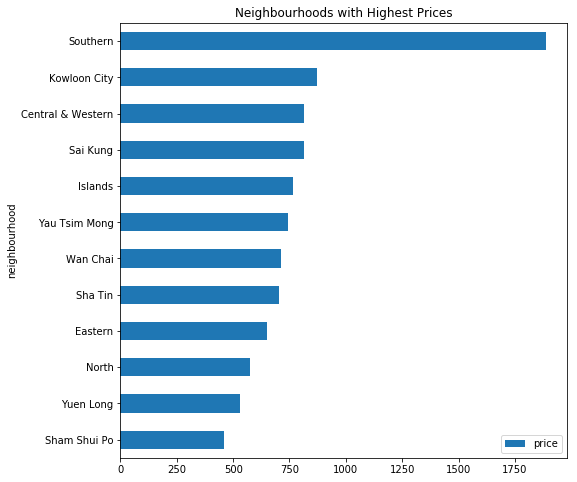

In [25]:
listvalue = pd.DataFrame()
listvalue['count'] = lists.groupby(['neighbourhood_cleansed']).count()['id']
listvalue['price'] = lists.groupby(['neighbourhood_cleansed']).mean()['price']
listvalue = listvalue.reset_index().\
                        query('count>100').\
                        sort_values(by = 'price').\
                        tail(20).\
                        rename(columns = {'neighbourhood_cleansed':'neighbourhood'})

listvalue.plot(kind = 'barh', 
               figsize = (8, 8), 
               y = 'price', 
               x = 'neighbourhood', 
               title = 'Neighbourhoods with Highest Prices')

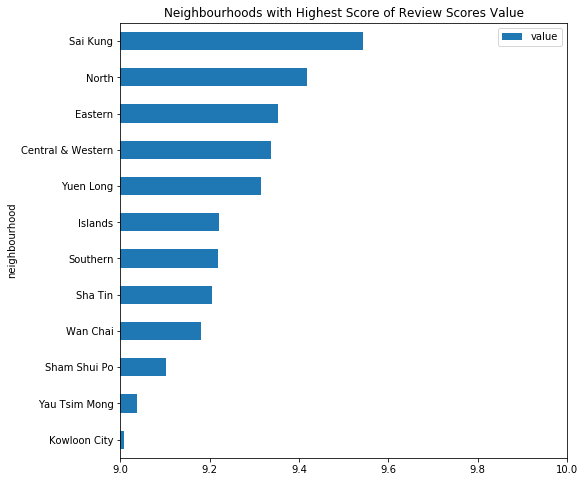

In [19]:
## 5.Horizontal bar chart for 20 neighbourhoods with highest score of value
listvalue = pd.DataFrame()
listvalue['count'] = lists.groupby(['neighbourhood_cleansed']).count()['id']
listvalue['value'] = lists.groupby(['neighbourhood_cleansed']).mean()['review_scores_value']
listvalue = listvalue.reset_index().\
                        query('count>100').\
                        sort_values(by = 'value').\
                        tail(20).\
                        rename(columns = {'neighbourhood_cleansed':'neighbourhood'})

listvalue.plot(kind = 'barh', 
               figsize = (8, 8), 
               y = 'value', 
               x = 'neighbourhood', 
               title = 'Neighbourhoods with Highest Score of Review Scores Value', 
               xlim = (9.0,10))

Ttest_indResult(statistic=20.89793339921917, pvalue=2.9649757308490743e-94)

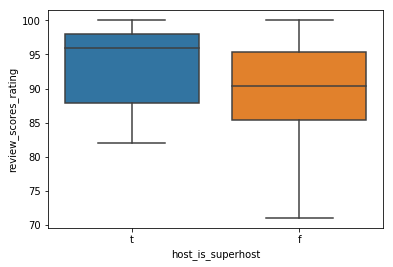

In [8]:
## 1.Airbnb authentication policies - "Superhost", identity verification, host profile pic
import scipy.stats as stats
from scipy.stats import ttest_ind
import seaborn as sns 
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

listhost = lists.groupby(['host_id'])['host_total_listings_count',
                                    'host_response_rate',
                                    'number_of_reviews',
                                    'review_scores_rating',
                                    'reviews_per_month'].mean()
df = lists[['host_id',
             'host_is_superhost',
             'host_has_profile_pic',
             'host_response_time',
             'host_identity_verified',
             'host_verifications',
             'host_neighbourhood']]
listhost = listhost.merge(df, on = 'host_id', how = 'left')

sns.boxplot(x = "host_is_superhost", y = "review_scores_rating", data = listhost, showfliers = False)
ttest_ind(listhost.query('host_is_superhost == "t"').dropna()['review_scores_rating'],
          listhost.query('host_is_superhost == "f"').dropna()['review_scores_rating'])




Ttest_indResult(statistic=nan, pvalue=nan)

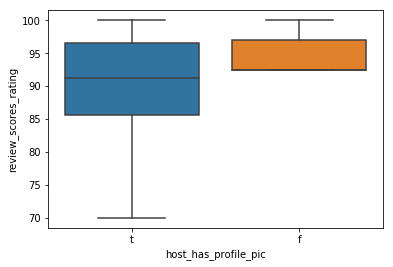

In [9]:
sns.boxplot(x = "host_has_profile_pic", y = "review_scores_rating", data = listhost, showfliers = False)
ttest_ind(listhost.query('host_has_profile_pic == "t"').dropna()['review_scores_rating'],
          listhost.query('host_has_profile_pic == "f"').dropna()['review_scores_rating'])


Ttest_indResult(statistic=8.788897514523295, pvalue=1.857419031440572e-18)

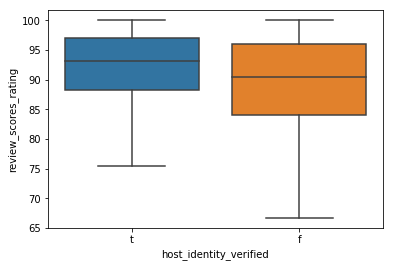

In [10]:
sns.boxplot(x = "host_identity_verified", y = "review_scores_rating", data = listhost, showfliers = False)
ttest_ind(listhost.query('host_identity_verified == "t"').dropna()['review_scores_rating'],
          listhost.query('host_identity_verified == "f"').dropna()['review_scores_rating'])

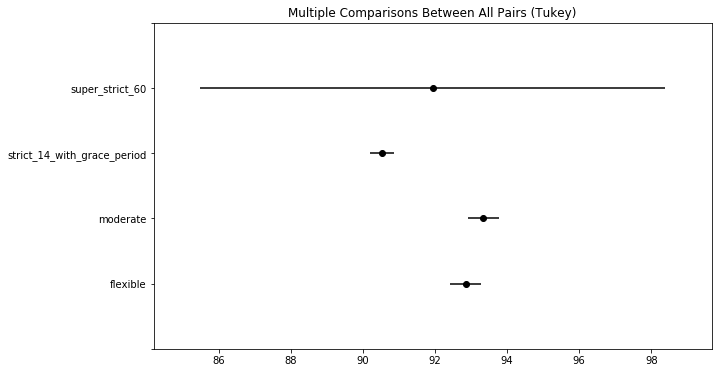

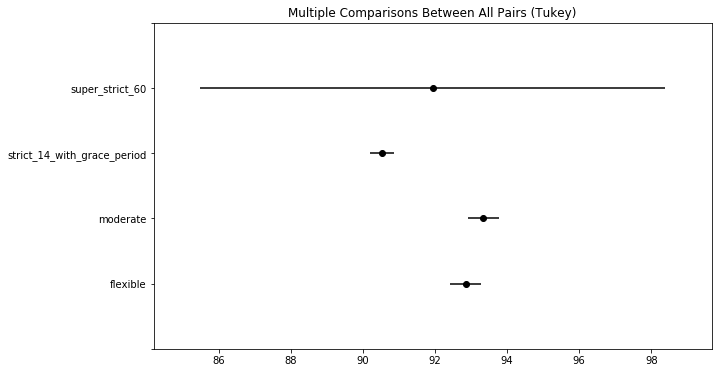

In [7]:
## 2.Host's cancellation policy

# lists.query('cancellation_policy == "super_strict_30"') #only 9 listings with this policy
# lists.query('cancellation_policy == "strict"') #only 63 listings with this policy which has changed to "strict_14_with_grace_period" from 2018
# remove "super_strict_30" and "strict"

list_cancel = lists[['review_scores_rating', 'cancellation_policy']].dropna()
list_cancel = list_cancel.query('cancellation_policy !=["super_strict_30","strict"]')
res = pairwise_tukeyhsd(list_cancel['review_scores_rating'], list_cancel['cancellation_policy'])
res.plot_simultaneous()